In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'Song_Recommendation_Dataset.csv')

In [2]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Track_0,Artist E,Album W,Song 5,46,211987,False,0.498,0.546,2,-10.73,1,0.769,0.732,0.932,0.232,0.117,144.26,3,Hip-Hop
1,Track_1,Artist B,Album X,Song 3,24,132535,True,0.426,0.592,1,-5.02,0,0.708,0.527,0.901,0.282,0.932,190.63,5,Classical
2,Track_2,Artist B,Album X,Song 5,97,257633,False,0.368,0.877,9,-54.27,1,0.356,0.756,0.945,0.254,0.303,135.56,5,Classical
3,Track_3,Artist D,Album W,Song 5,28,170233,False,0.907,0.807,3,-22.86,0,0.192,0.987,0.124,0.646,0.549,121.85,3,Jazz
4,Track_4,Artist E,Album Y,Song 5,81,182365,True,0.124,0.890,4,-48.14,0,0.688,0.949,0.419,0.300,0.586,73.35,3,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100142,Track_100142,Artist D,Album Y,Song 1,18,259316,False,0.186,0.873,8,-17.51,1,0.545,0.569,0.177,0.079,0.164,88.59,5,Hip-Hop
100143,Track_100143,Artist B,Album Z,Song 2,28,218072,True,0.775,0.143,8,-47.93,1,0.681,0.917,0.068,0.187,0.825,81.02,3,Electronic
100144,Track_100144,Artist B,Album Y,Song 4,8,272568,True,0.622,0.675,0,-36.73,0,0.278,0.998,0.497,0.158,0.869,181.29,3,Jazz
100145,Track_100145,Artist D,Album V,Song 1,97,242750,True,0.736,0.156,3,-37.31,0,0.816,0.905,0.214,0.053,0.633,140.90,3,Jazz


In [3]:
df.shape

(100147, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100147 entries, 0 to 100146
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          100147 non-null  object 
 1   artists           100147 non-null  object 
 2   album_name        100147 non-null  object 
 3   track_name        100147 non-null  object 
 4   popularity        100147 non-null  int64  
 5   duration_ms       100147 non-null  int64  
 6   explicit          100147 non-null  bool   
 7   danceability      100147 non-null  float64
 8   energy            100147 non-null  float64
 9   key               100147 non-null  int64  
 10  loudness          100147 non-null  float64
 11  mode              100147 non-null  int64  
 12  speechiness       100147 non-null  float64
 13  acousticness      100147 non-null  float64
 14  instrumentalness  100147 non-null  float64
 15  liveness          100147 non-null  float64
 16  valence           10

In [5]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Track_0,Artist E,Album W,Song 5,46,211987,False,0.498,0.546,2,-10.73,1,0.769,0.732,0.932,0.232,0.117,144.26,3,Hip-Hop
1,Track_1,Artist B,Album X,Song 3,24,132535,True,0.426,0.592,1,-5.02,0,0.708,0.527,0.901,0.282,0.932,190.63,5,Classical
2,Track_2,Artist B,Album X,Song 5,97,257633,False,0.368,0.877,9,-54.27,1,0.356,0.756,0.945,0.254,0.303,135.56,5,Classical
3,Track_3,Artist D,Album W,Song 5,28,170233,False,0.907,0.807,3,-22.86,0,0.192,0.987,0.124,0.646,0.549,121.85,3,Jazz
4,Track_4,Artist E,Album Y,Song 5,81,182365,True,0.124,0.890,4,-48.14,0,0.688,0.949,0.419,0.300,0.586,73.35,3,Pop


In [6]:
df.tail()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
100142,Track_100142,Artist D,Album Y,Song 1,18,259316,False,0.186,0.873,8,-17.51,1,0.545,0.569,0.177,0.079,0.164,88.59,5,Hip-Hop
100143,Track_100143,Artist B,Album Z,Song 2,28,218072,True,0.775,0.143,8,-47.93,1,0.681,0.917,0.068,0.187,0.825,81.02,3,Electronic
100144,Track_100144,Artist B,Album Y,Song 4,8,272568,True,0.622,0.675,0,-36.73,0,0.278,0.998,0.497,0.158,0.869,181.29,3,Jazz
100145,Track_100145,Artist D,Album V,Song 1,97,242750,True,0.736,0.156,3,-37.31,0,0.816,0.905,0.214,0.053,0.633,140.90,3,Jazz
100146,Track_100146,Artist D,Album W,Song 4,19,171954,True,0.569,0.993,2,-42.66,0,0.456,0.866,0.099,0.053,0.740,141.37,3,Hip-Hop


In [7]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000,100147.000000
mean,50.434951,209825.167963,0.550178,0.548560,5.487024,-29.965335,0.499636,0.499654,0.501338,0.499680,0.498734,0.500327,130.130108,3.998922
std,28.908927,51911.740482,0.259645,0.259542,3.450434,17.310608,0.500002,0.288892,0.288481,0.288457,0.289837,0.288735,40.468117,0.818670
min,1.000000,120001.000000,0.100000,0.100000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,3.000000
25%,25.000000,164689.500000,0.326000,0.323000,2.000000,-44.940000,0.000000,0.249000,0.251000,0.250000,0.247000,0.250000,95.015000,3.000000
50%,50.000000,209751.000000,0.550000,0.549000,5.000000,-29.950000,0.000000,0.500000,0.504000,0.498000,0.498000,0.499000,129.940000,4.000000
75%,76.000000,254664.000000,0.774000,0.773000,8.000000,-15.020000,1.000000,0.749000,0.750000,0.751000,0.750000,0.751000,165.270000,5.000000
max,100.000000,299997.000000,1.000000,1.000000,11.000000,-0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,5.000000


In [8]:
df.isnull()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
list(df.columns)

['track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [48]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity          float64
duration_ms         float64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [12]:
df['track_name'].duplicated().sum()

np.int64(100142)

In [13]:
df['artists'].duplicated().sum()              

np.int64(100142)

In [14]:
df_numeric = df[[
    'popularity', 'duration_ms', 'danceability', 'energy', 'key', 
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'time_signature'
]].copy()

In [15]:
df_numeric

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,46,211987,0.498,0.546,2,-10.73,1,0.769,0.732,0.932,0.232,0.117,144.26,3
1,24,132535,0.426,0.592,1,-5.02,0,0.708,0.527,0.901,0.282,0.932,190.63,5
2,97,257633,0.368,0.877,9,-54.27,1,0.356,0.756,0.945,0.254,0.303,135.56,5
3,28,170233,0.907,0.807,3,-22.86,0,0.192,0.987,0.124,0.646,0.549,121.85,3
4,81,182365,0.124,0.890,4,-48.14,0,0.688,0.949,0.419,0.300,0.586,73.35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100142,18,259316,0.186,0.873,8,-17.51,1,0.545,0.569,0.177,0.079,0.164,88.59,5
100143,28,218072,0.775,0.143,8,-47.93,1,0.681,0.917,0.068,0.187,0.825,81.02,3
100144,8,272568,0.622,0.675,0,-36.73,0,0.278,0.998,0.497,0.158,0.869,181.29,3
100145,97,242750,0.736,0.156,3,-37.31,0,0.816,0.905,0.214,0.053,0.633,140.90,3


In [16]:
df['track_genre']

0            Hip-Hop
1          Classical
2          Classical
3               Jazz
4                Pop
             ...    
100142       Hip-Hop
100143    Electronic
100144          Jazz
100145          Jazz
100146       Hip-Hop
Name: track_genre, Length: 100147, dtype: object

In [17]:
df['track_genre'].unique()

array(['Hip-Hop', 'Classical', 'Jazz', 'Pop', 'Rock', 'Country',
       'Electronic'], dtype=object)

In [18]:
target_genres = ['Classical', 'Jazz', 'Country']

df_filtered = df[df['track_genre'].isin(target_genres)].copy()

In [19]:
df_filtered

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,Track_1,Artist B,Album X,Song 3,24,132535,True,0.426,0.592,1,-5.02,0,0.708,0.527,0.901,0.282,0.932,190.63,5,Classical
2,Track_2,Artist B,Album X,Song 5,97,257633,False,0.368,0.877,9,-54.27,1,0.356,0.756,0.945,0.254,0.303,135.56,5,Classical
3,Track_3,Artist D,Album W,Song 5,28,170233,False,0.907,0.807,3,-22.86,0,0.192,0.987,0.124,0.646,0.549,121.85,3,Jazz
7,Track_7,Artist A,Album W,Song 5,39,182826,True,0.380,0.825,11,-58.97,0,0.227,0.426,0.230,0.770,0.671,150.03,4,Classical
8,Track_8,Artist D,Album W,Song 5,21,214364,False,0.178,0.344,2,-22.43,0,0.853,0.581,0.190,0.527,0.919,195.60,5,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100136,Track_100136,Artist C,Album Z,Song 2,54,249059,True,0.295,0.282,4,-12.58,1,0.291,0.891,0.677,0.646,0.855,115.87,4,Jazz
100140,Track_100140,Artist B,Album X,Song 4,97,212957,False,0.726,0.170,10,-6.62,1,0.203,0.637,0.036,0.725,0.371,149.55,3,Country
100141,Track_100141,Artist D,Album W,Song 3,80,247248,True,0.735,0.118,5,-24.50,0,0.937,0.352,0.202,0.606,0.396,71.21,4,Classical
100144,Track_100144,Artist B,Album Y,Song 4,8,272568,True,0.622,0.675,0,-36.73,0,0.278,0.998,0.497,0.158,0.869,181.29,3,Jazz


In [20]:
df_filtered.shape

(43097, 20)

## Convert numerical attributes like tempo, loudness, energy, and valence into meaningful features for analysis.

In [21]:
df_filtered.loc[df_filtered['loudness'] < -20, 'loudness_category'] = 'Soft'
df_filtered.loc[(df_filtered['loudness'] >= -20) & (df_filtered['loudness'] <= -10), 'loudness_category'] = 'Normal'
df_filtered.loc[df_filtered['loudness'] > -10, 'loudness_category'] = 'Loud'

In [22]:
df_filtered.shape

(43097, 21)

In [23]:
df_filtered.loc[df_filtered['tempo'] < 90, 'tempo_category'] = 'Slow'
df_filtered.loc[(df_filtered['tempo'] >= 90) & (df_filtered['tempo'] <= 120), 'tempo_category'] = 'Medium'
df_filtered.loc[df_filtered['tempo'] > 120, 'tempo_category'] = 'Fast'

In [24]:
df_filtered.shape

(43097, 22)

In [25]:
df_filtered.loc[df_filtered['energy'] < 0.4, 'energy_category'] = 'Low'
df_filtered.loc[(df_filtered['energy'] >= 0.4) & (df_filtered['energy'] <= 0.7), 'energy_category'] = 'Medium'
df_filtered.loc[df_filtered['energy'] > 0.7, 'energy_category'] = 'High'

In [26]:
df_filtered.shape

(43097, 23)

In [27]:
df_filtered.loc[df_filtered['valence'] < 0.3, 'valence_category'] = 'Sad'
df_filtered.loc[(df_filtered['valence'] >= 0.3) & (df_filtered['valence'] <= 0.6), 'valence_category'] = 'Neutral'
df_filtered.loc[df_filtered['valence'] > 0.6, 'valence_category'] = 'Happy'

In [28]:
df_filtered.shape

(43097, 24)

## Deleting the columns that are not useful

In [29]:
columns_to_drop = [
    'album_name', 'explicit', 'danceability', 'key', 'mode', 
    'speechiness', 'liveness', 'time_signature'
]

In [30]:
df_filtered = df_filtered.drop(columns=columns_to_drop, axis=1)

In [31]:
df_filtered.shape

(43097, 16)

In [32]:
df_filtered.columns

Index(['track_id', 'artists', 'track_name', 'popularity', 'duration_ms',
       'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence',
       'tempo', 'track_genre', 'loudness_category', 'tempo_category',
       'energy_category', 'valence_category'],
      dtype='object')

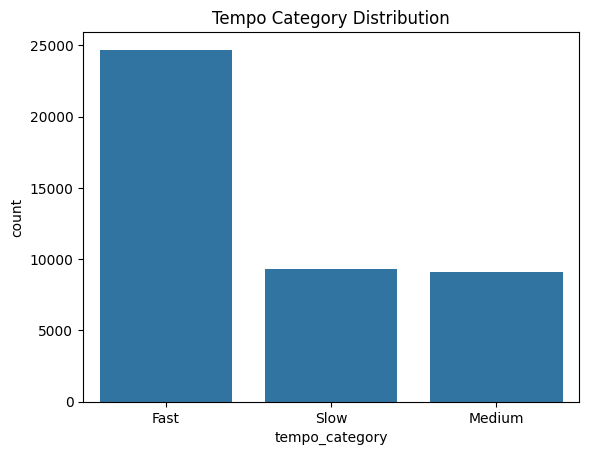

In [81]:
sns.countplot(data=df_filtered, x='tempo_category')
plt.title("Tempo Category Distribution")
plt.show()

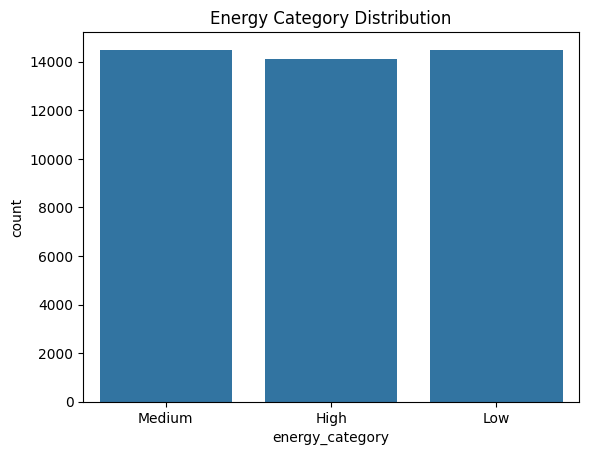

In [85]:
sns.countplot(data=df_filtered, x='energy_category')
plt.title("Energy Category Distribution")
plt.show()

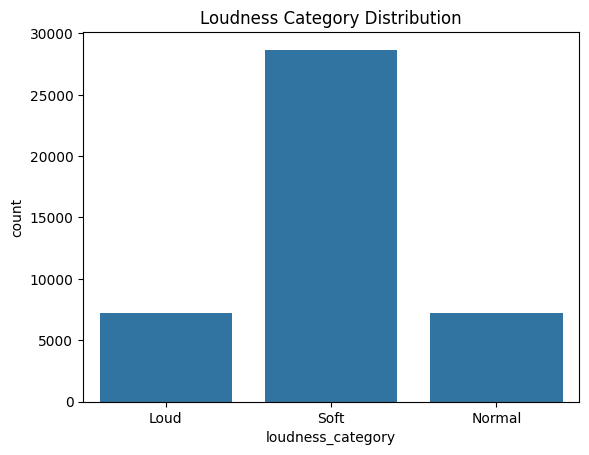

In [83]:
sns.countplot(data=df_filtered, x='loudness_category')
plt.title("Loudness Category Distribution")
plt.show()

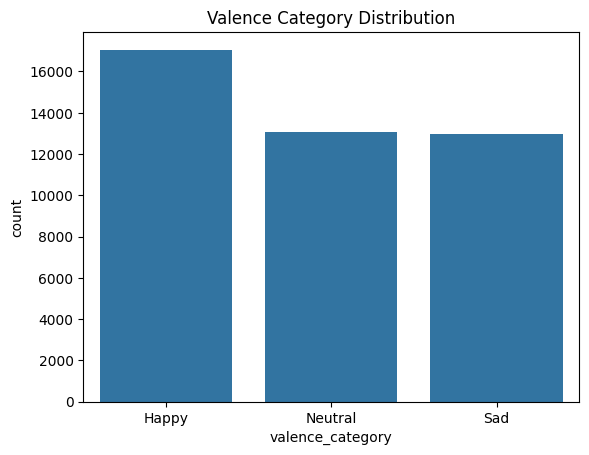

In [86]:
sns.countplot(data=df_filtered, x='valence_category')
plt.title("Valence Category Distribution")
plt.show()

### High Valence, High Energy (Top Right): You'd expect to see genres associated with happy, energetic music like pop, dance, or upbeat electronic in this area.
### High Valence, Low Energy (Bottom Right): This might contain genres like acoustic pop, light rock, or relaxed electronic music – positive but not intensely energetic.
### Low Valence, High Energy (Top Left): This could include genres like heavy metal, intense electronic, or aggressive rock – energetic but not necessarily happy.
### Low Valence, Low Energy (Bottom Left): This area might contain genres like classical, ambient, blues, or sad ballads – music that is neither particularly energetic nor happy.

In [35]:
df_sample = df_filtered.sample(n=500, random_state=42)

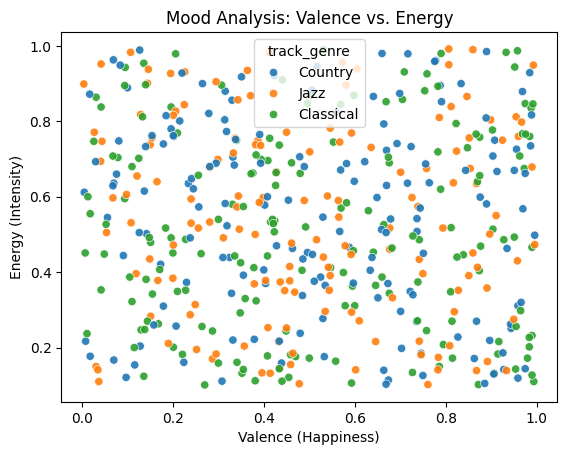

In [36]:
sns.scatterplot(data=df_sample, x='valence', y='energy', hue='track_genre', alpha=0.9)
plt.title("Mood Analysis: Valence vs. Energy")
plt.xlabel("Valence (Happiness)")
plt.ylabel("Energy (Intensity)")
plt.show()

# High valence + High energy → Happy, upbeat songs 🎉.
# Low valence + Low energy → Calm, soothing music 🌿.

In [37]:
df_filtered.columns

Index(['track_id', 'artists', 'track_name', 'popularity', 'duration_ms',
       'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence',
       'tempo', 'track_genre', 'loudness_category', 'tempo_category',
       'energy_category', 'valence_category'],
      dtype='object')

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = ['popularity', 'duration_ms', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

  track_id   artists album_name track_name  popularity  duration_ms  explicit  \
0  Track_0  Artist E    Album W     Song 5    0.454545     0.511045     False   
1  Track_1  Artist B    Album X     Song 3    0.232323     0.069635      True   
2  Track_2  Artist B    Album X     Song 5    0.969697     0.764639     False   
3  Track_3  Artist D    Album W     Song 5    0.272727     0.279073     False   
4  Track_4  Artist E    Album Y     Song 5    0.808081     0.346474      True   

   danceability    energy  key  loudness  mode  speechiness  acousticness  \
0         0.498  0.495556    2  0.821167     1        0.769         0.732   
1         0.426  0.546667    1  0.916333     0        0.708         0.527   
2         0.368  0.863333    9  0.095500     1        0.356         0.756   
3         0.907  0.785556    3  0.619000     0        0.192         0.987   
4         0.124  0.877778    4  0.197667     0        0.688         0.949   

   instrumentalness  liveness  valence     tempo  

In [60]:
floats = []
for col in df_filtered.columns:
  if df_filtered[col].dtype == 'float':
    floats.append(col)
 
print(len(floats))
print(floats)

6
['energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']


<Axes: xlabel='energy', ylabel='Density'>

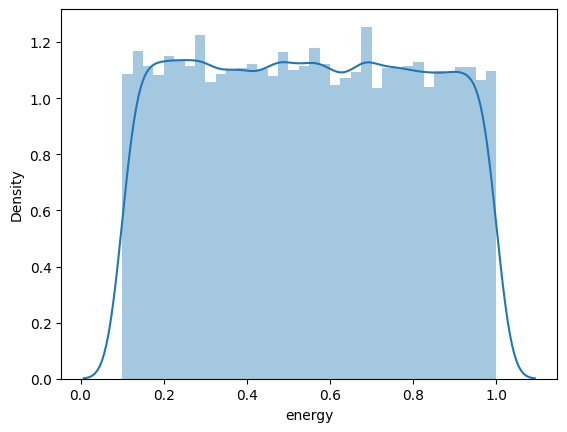

In [62]:
sns.distplot(df_filtered['energy'])

<Axes: xlabel='loudness', ylabel='Density'>

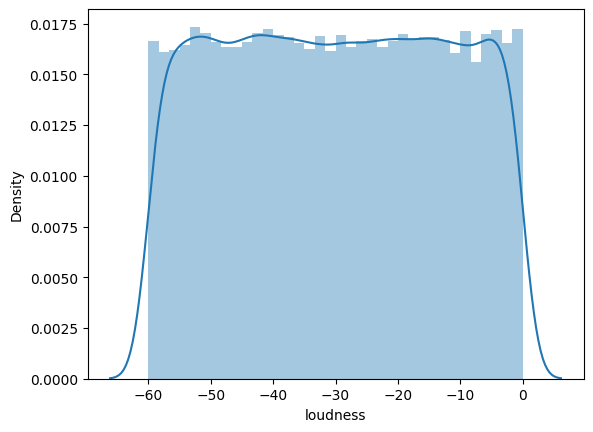

In [63]:
sns.distplot(df_filtered['loudness'])

<Axes: xlabel='acousticness', ylabel='Density'>

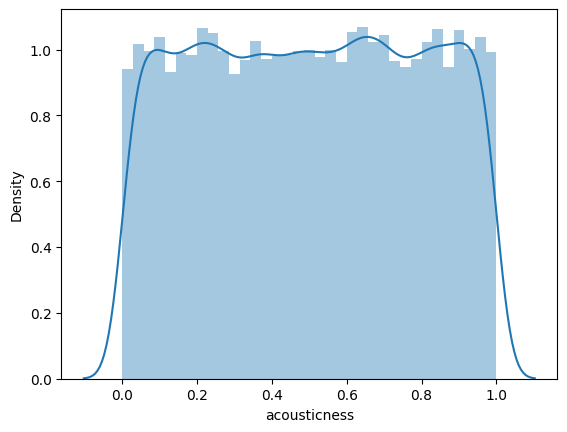

In [64]:
sns.distplot(df_filtered['acousticness'])

<Axes: xlabel='valence', ylabel='Density'>

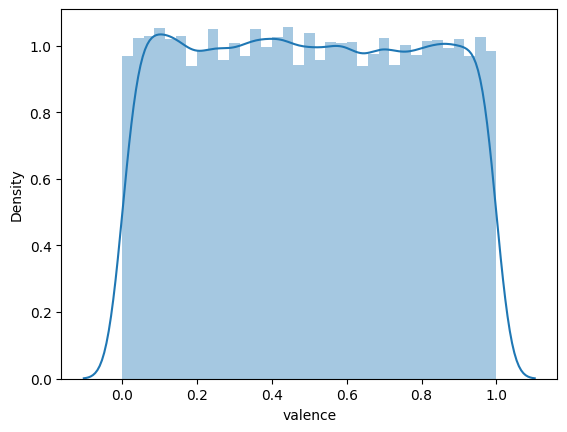

In [65]:
sns.distplot(df_filtered['valence'])

<Axes: xlabel='tempo', ylabel='Density'>

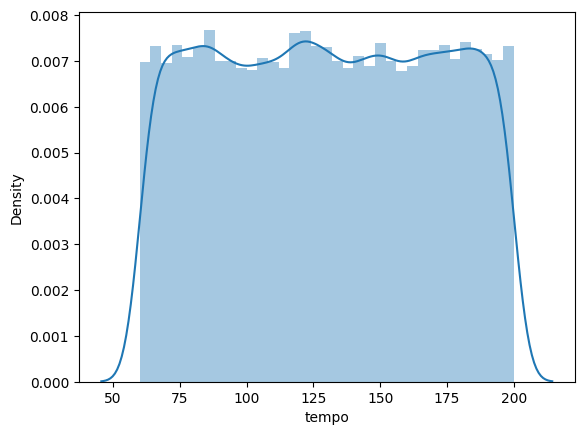

In [66]:
sns.distplot(df_filtered['tempo'])

### 2.	Exploratory Data Analysis (EDA)
### ○	Analyze popularity trends based on track_genre.
### ○	Identify characteristics of relaxing and devotional music (e.g., high acousticness, low energy, moderate tempo).
### ○	Segment music based on mood, tempo, and acousticness.

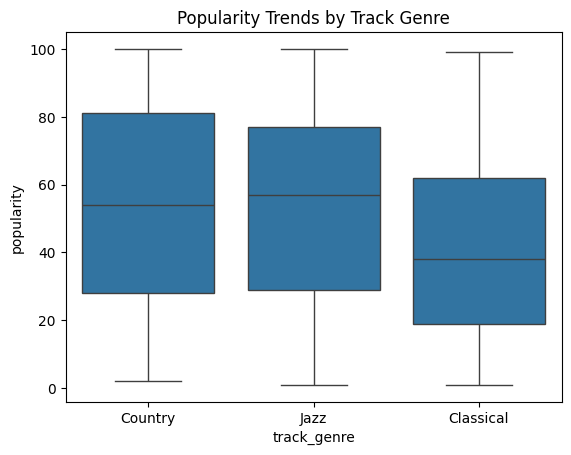

In [88]:
sns.boxplot(data=df_sample, x='track_genre', y='popularity')
plt.title('Popularity Trends by Track Genre')
plt.show()

In [40]:
relaxing_music = df_filtered[
    (df_filtered['acousticness'] > 0.7) & 
    (df_filtered['energy'] < 0.4) & 
    (df_filtered['tempo'] >= 60) & (df_filtered['tempo'] <= 90)
]

In [41]:
relaxing_music.shape

(921, 16)

In [46]:
print(relaxing_music[['track_name', 'artists', 'acousticness', 'energy', 'tempo']].head())

    track_name   artists  acousticness  energy  tempo
123     Song 4  Artist E         0.845   0.140  63.35
375     Song 5  Artist A         0.792   0.301  62.51
640     Song 1  Artist E         0.718   0.285  75.41
685     Song 5  Artist E         0.794   0.182  84.12
707     Song 1  Artist D         0.941   0.316  85.19


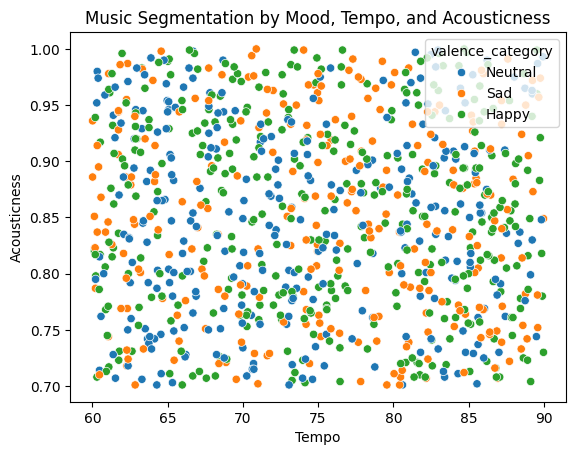

In [94]:
sns.scatterplot(data=relaxing_music, x='tempo', y='acousticness', hue='valence_category')
plt.title('Music Segmentation by Mood, Tempo, and Acousticness')
plt.xlabel('Tempo')
plt.ylabel('Acousticness')
plt.show()
 # High Acousticness & Low Tempo → 🎶 Relaxing & Meditative Music

In [100]:
tracks = relaxing_music.sort_values(by=['popularity'], ascending=False).head(10000)

In [101]:
tracks 

,track_id,artists,track_name,popularity,duration_ms,energy,loudness,acousticness,instrumentalness,valence,tempo,track_genre,loudness_category,tempo_category,energy_category,valence_category
3327,Track_3327,Artist E,Song 5,100,121587,0.237,-39.52,0.787,0.767,0.443,64.29,Country,Soft,Slow,Low,Neutral
55411,Track_55411,Artist B,Song 3,100,250891,0.340,-7.93,0.798,0.944,0.233,67.44,Classical,Loud,Slow,Low,Sad
72791,Track_72791,Artist E,Song 4,100,208314,0.157,-35.68,0.848,0.630,0.767,70.72,Jazz,Soft,Slow,Low,Happy
74038,Track_74038,Artist B,Song 4,100,152743,0.102,-58.03,0.776,0.463,0.122,66.19,Classical,Soft,Slow,Low,Sad
81464,Track_81464,Artist D,Song 3,100,178700,0.374,-29.05,0.784,0.179,0.436,70.76,Jazz,Soft,Slow,Low,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43810,Track_43810,Artist B,Song 4,1,233539,0.269,-46.78,0.839,0.221,0.502,72.21,Classical,Soft,Slow,Low,Neutral
82739,Track_82739,Artist E,Song 4,1,176982,0.278,-23.84,0.857,0.085,0.220,87.58,Country,Soft,Slow,Low,Sad
81686,Track_81686,Artist C,Song 1,1,173509,0.291,-35.11,0.988,0.852,0.811,64.41,Country,Soft,Slow,Low,Happy
29061,Track_29061,Artist D,Song 3,1,268567,0.397,-11.30,0.951,0.380,0.226,72.70,Classical,Normal,Slow,Low,Sad
